Entregar um notebook Python que contempla:
1 - Pelo menos 10 imagens diferentes obtidas da Internet, de licença aberta;
2 - Pipeline de processamento e preparação de dados de imagens e funções de testes que compara resultados esperados com os obtidos;
3 - Base de dados de imagens processadas em um dataframe."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_path = r"/content/drive/My Drive/cats" # path onde há 12 imagens de gatos extraídas de banco de dados livre e gratuito para uso

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import numpy as np

Redimensionamento das imagens para um tamanho padrão.

In [ ]:
output = r"/content/drive/My Drive/output_cats" # path onde há 12 imagens de gatos alteradas

new_size = (150, 150)

def resize_images(input_folder, output_folder, new_size):
    # Cria a pasta de saída se ela não existir(output onde será enocntrado as imagens)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Percorre todos os arquivos na pasta de entrada(base_path)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)
            # Redimensionamento da imagem
            img_resized = img.resize(new_size)
            output_path = os.path.join(output_folder, filename)
            # Salva a imagem já redimensionada
            img_resized.save(output_path)
            print(f'Imagem {filename} redimensionada e salva em {output_path}')

# Callback da função
resize_images(base_path, output, new_size)

Imagem green.png redimensionada e salva em /content/drive/My Drive/output_cats/green.png
Imagem red.png redimensionada e salva em /content/drive/My Drive/output_cats/red.png


Conversão de cores para totalmente vermelho


In [ ]:
def convert_to_red(input_folder, output_folder):
    # Mais uma vez cria a pasta de saída se ela não existir
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Percorre todos os arquivos na pasta de entrada(base_path)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(base_path, filename)
            img = Image.open(img_path)
            img_array = np.array(img)

            # Define os canais verde e azul para zero
            if len(img_array.shape) >= 3:  # Verifica se a imagem é colorida
                img_array[..., 1] = 0  # Canal verde
                img_array[..., 2] = 0  # Canal azul

            # Converte a matriz NumPy para uma imagem PIL a fim de facilitar
            img_red = Image.fromarray(img_array)

            # Mostra a imagem alterada pra cor vermelha
            img_red.show()
            output_path = os.path.join(output_folder, filename)

            # Salva a imagem convertida
            img_red.save(output_path)
            print(f'Imagem {filename} convertida para vermelho e salva em {output_path}')

# Callback da função
convert_to_red(base_path, output)

Imagem green.png convertida para vermelho e salva em /content/drive/My Drive/output_cats/green.png
Imagem red.png convertida para vermelho e salva em /content/drive/My Drive/output_cats/red.png


Extração de características específicas das imagens, como histograma de cores ou características de textura.




In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops


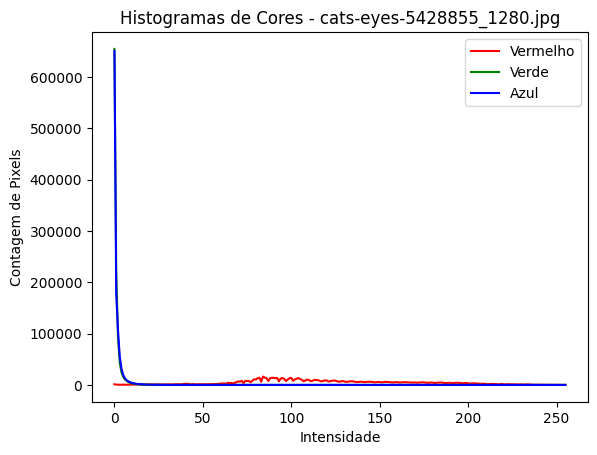

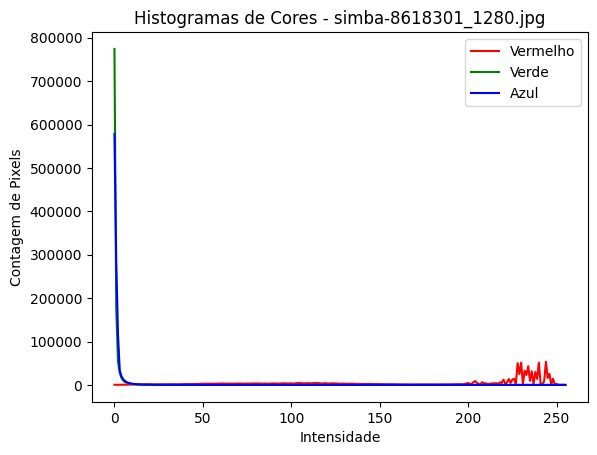

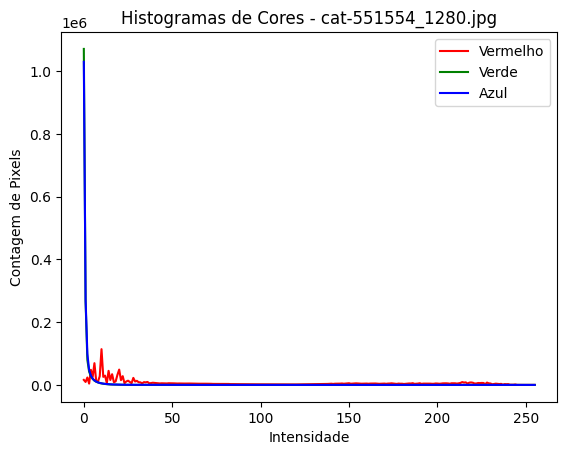

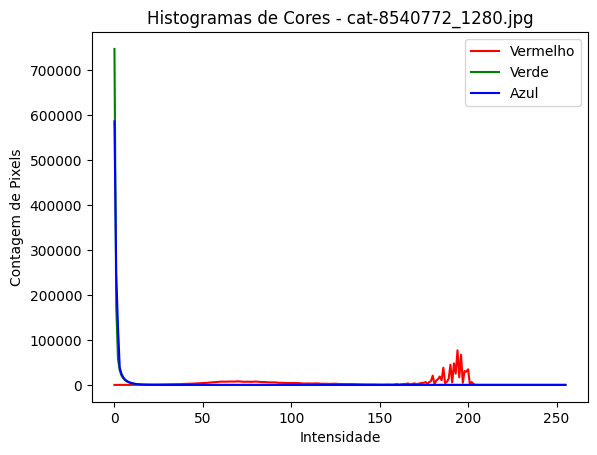

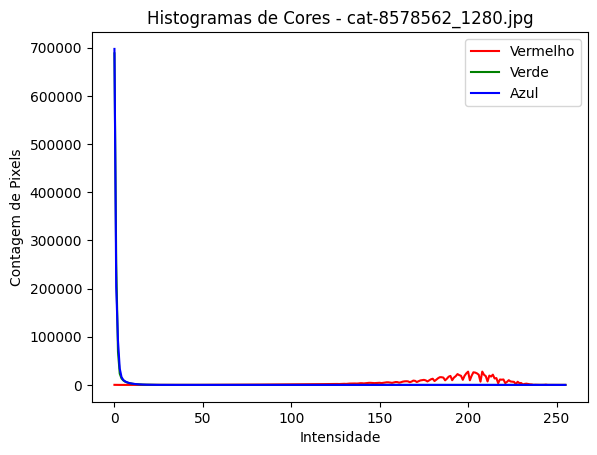

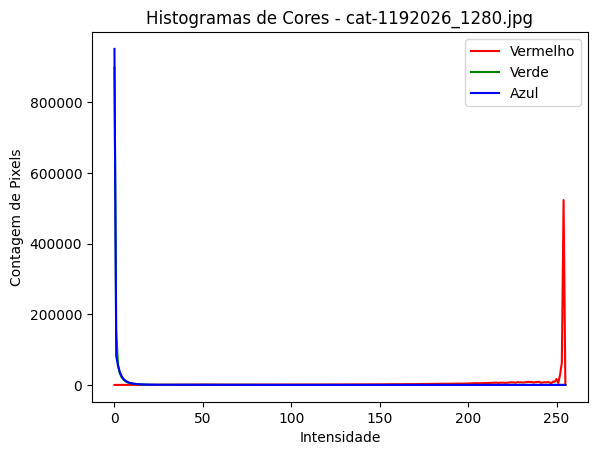

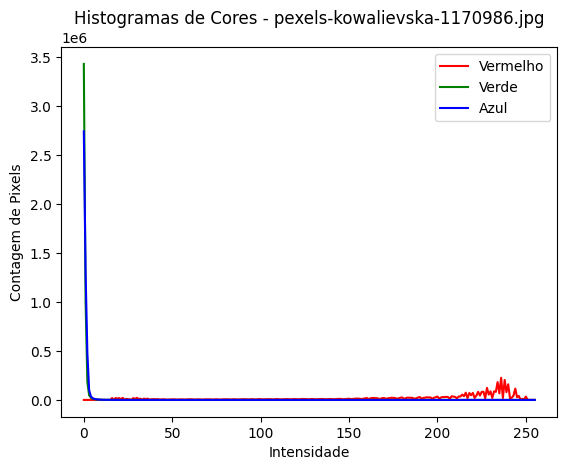

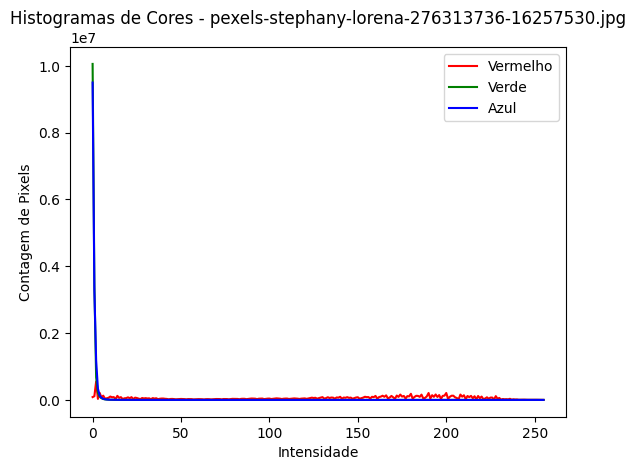

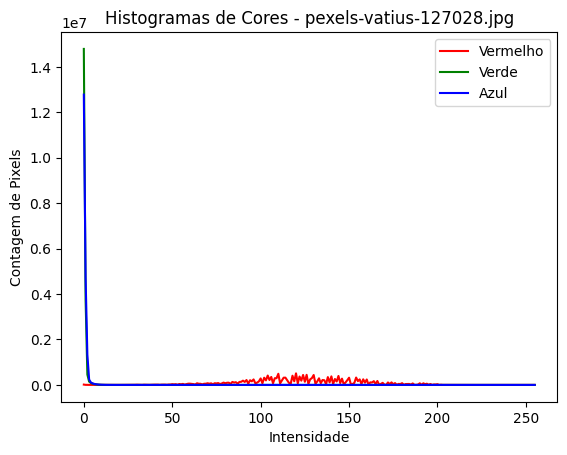

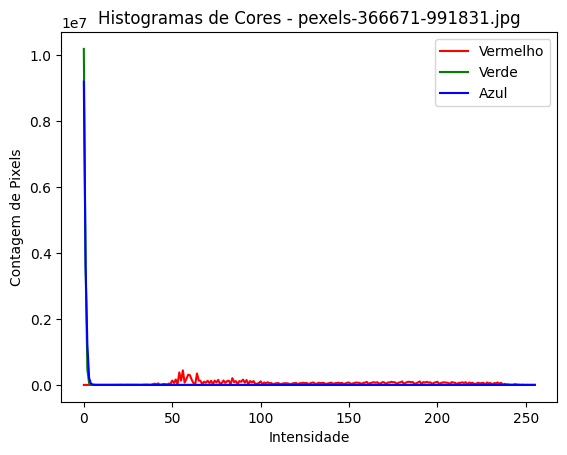

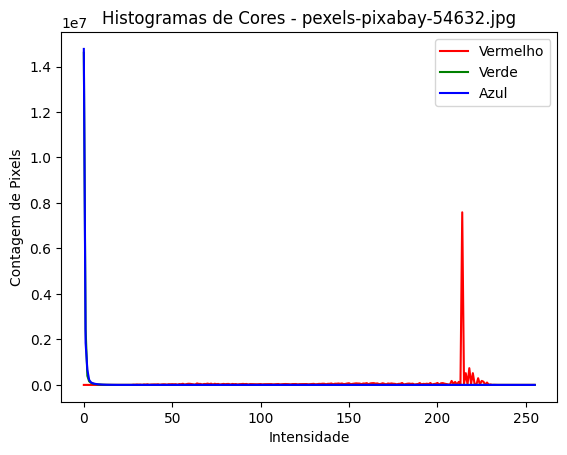

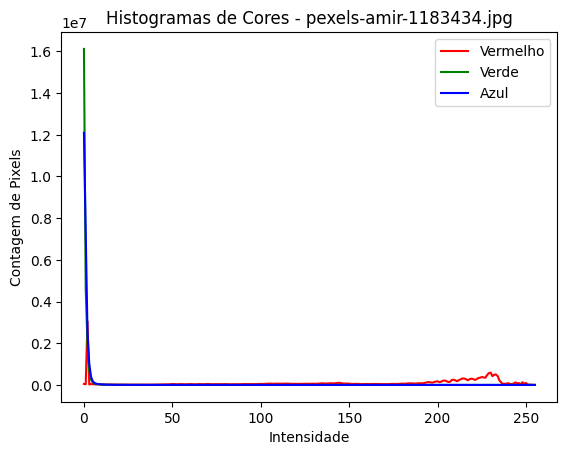

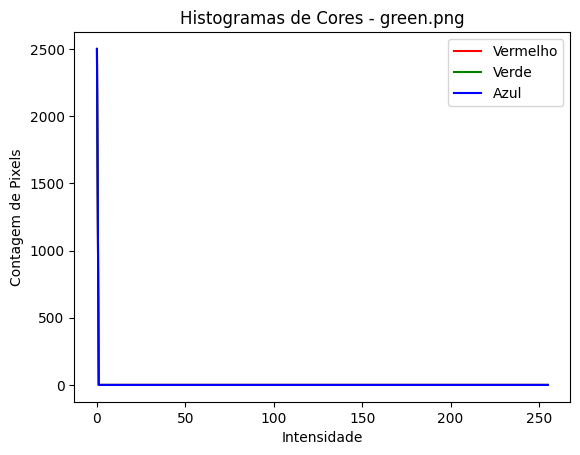

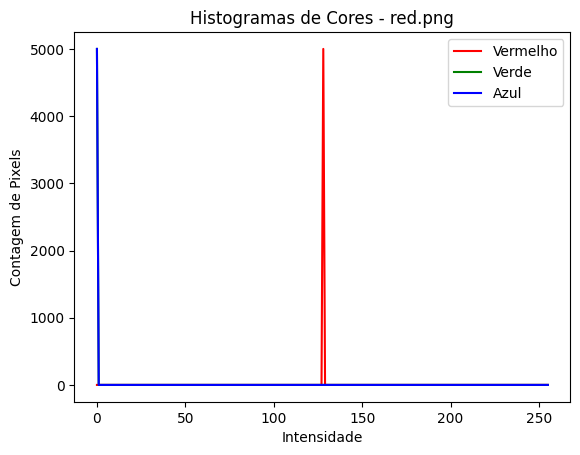

In [ ]:
def extract_color_histogram_from_drive(image_folder):
    if not os.path.exists(image_folder):
        print(f"A pasta {image_folder} não existe.")
        return

    # Percorre todos os arquivos na pasta e vê se é mesmo uma imagem
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Erro ao carregar a imagem {filename}.")
                continue

            # Cria um histograma para cada canal de cor
            hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])
            hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
            hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])

            plt.figure()
            plt.title(f"Histogramas de Cores - {filename}")
            plt.xlabel("Intensidade")
            plt.ylabel("Contagem de Pixels")
            plt.plot(hist_r, color='r', label='Vermelho')
            plt.plot(hist_g, color='g', label='Verde')
            plt.plot(hist_b, color='b', label='Azul')
            plt.legend()
            plt.show()

# Exemplo de uso:
image_folder = '/content/drive/My Drive/output_cats'
extract_color_histogram_from_drive(image_folder)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

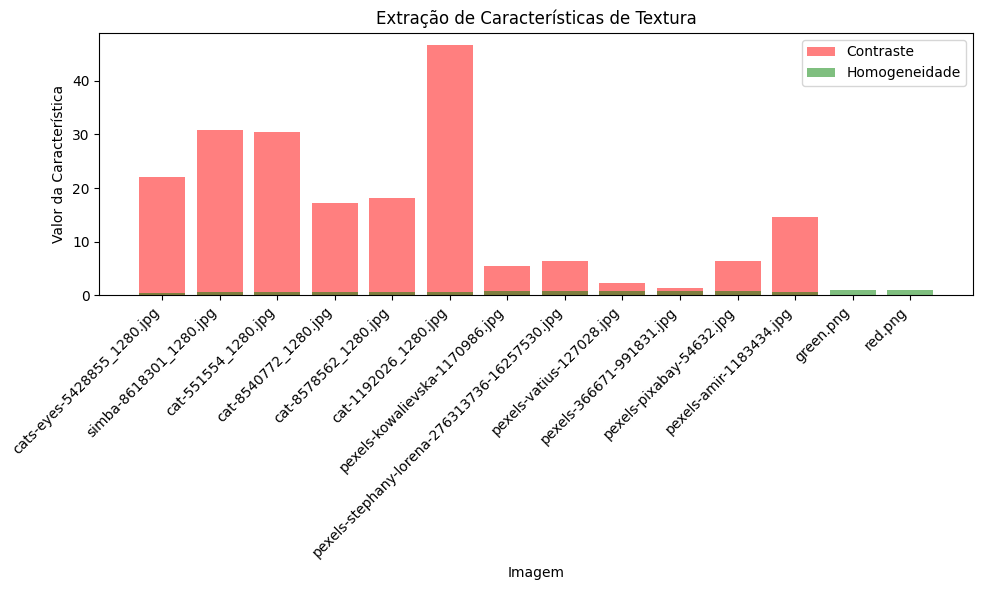

In [ ]:
def extract_texture_features_from_drive(output):
    if not os.path.exists(image_folder):
        print(f"A pasta {image_folder} não existe.")
        return

    # Inicia com listas vazias para que futuramente receba conteúdo
    filenames = []
    contrasts = []
    homogeneities = []


    # Percorre todos os arquivos na pasta disponível no drive(pastas com imagens presentes no Github)
    for filename in os.listdir(image_folder):
        # Verifica se o arquivo é uma imagem com formato aceito, sendo das 3 seguintes formas a seguir
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)

            img = cv2.imread(image_path)

            # Vê se a imagem foi carregada
            if img is None:
                print(f"Erro ao carregar a imagem {filename}.")
                continue

            # Extrai o canal vermelho da imagem
            red_channel = img[:, :, 2]

            # Calcula a GLCM
            glcm = greycomatrix(red_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

            # Extrai características de textura
            contrast = greycoprops(glcm, 'contrast')[0, 0]
            homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

            # Armazena as características
            filenames.append(filename)
            contrasts.append(contrast)
            homogeneities.append(homogeneity)

    # Plotagem dos valores das características
    plt.figure(figsize=(10, 6))
    plt.bar(filenames, contrasts, color='r', alpha=0.5, label='Contraste')
    plt.bar(filenames, homogeneities, color='g', alpha=0.5, label='Homogeneidade')
    plt.xlabel('Imagem')
    plt.ylabel('Valor da Característica')
    plt.title('Extração de Características de Textura')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Caminho da pasta onde estão as imagens trabalhadas
image_folder = '/content/drive/My Drive/output_cats'
extract_texture_features_from_drive(image_folder)

# Testes

Conjunto de casos de teste baseados nas imagens processadas, comparando as características extraídas ou a aparência da imagem processada com resultados esperados.




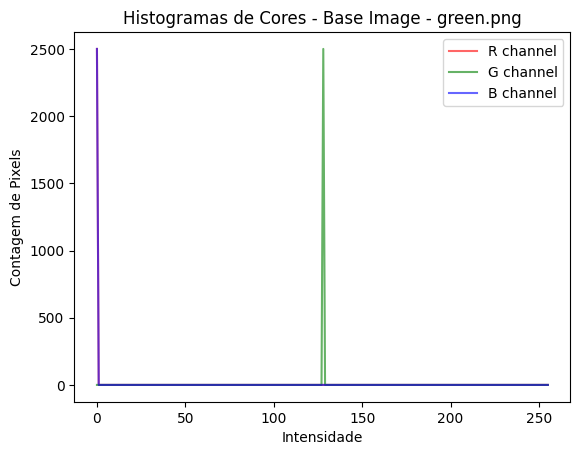

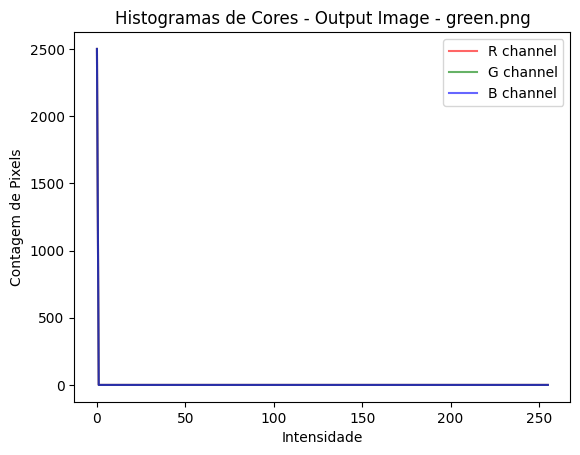

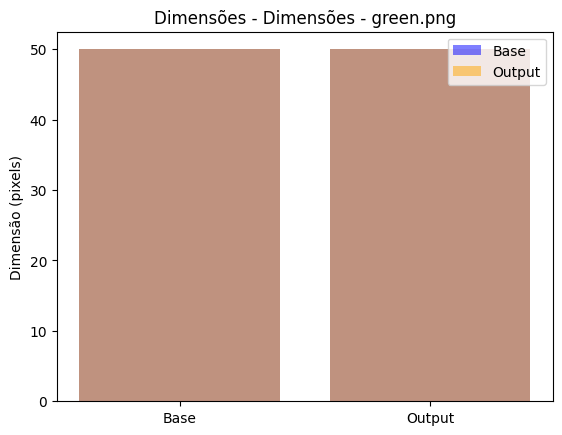

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


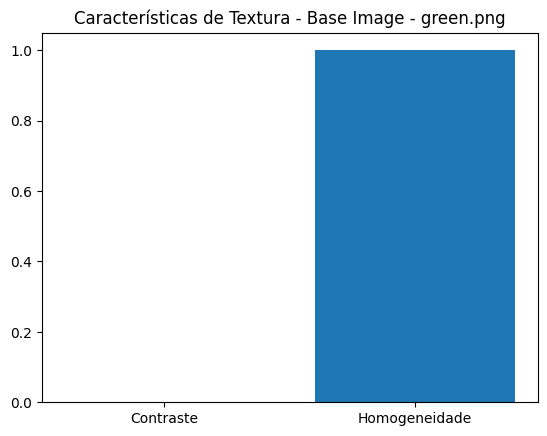

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


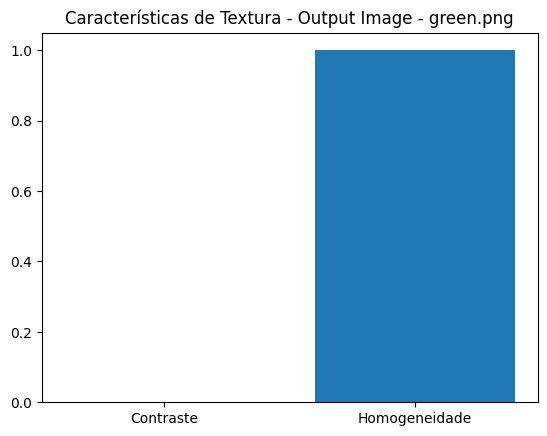

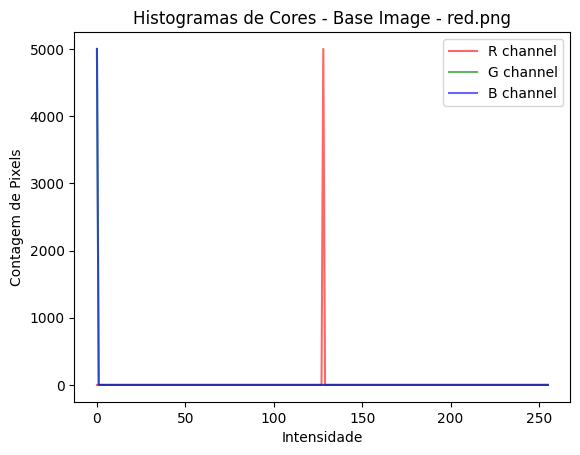

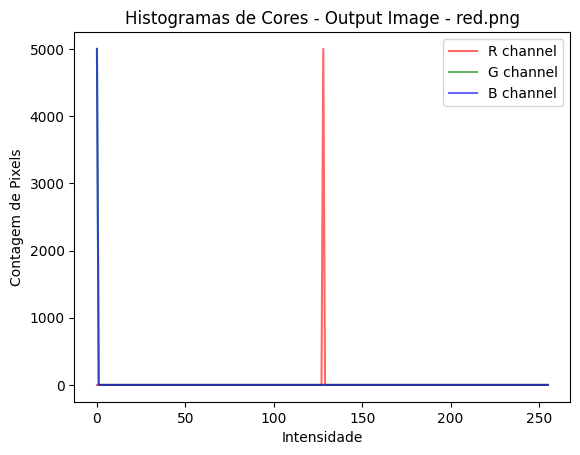

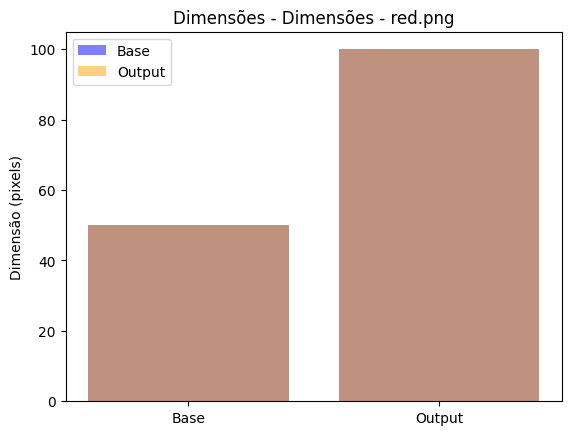

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


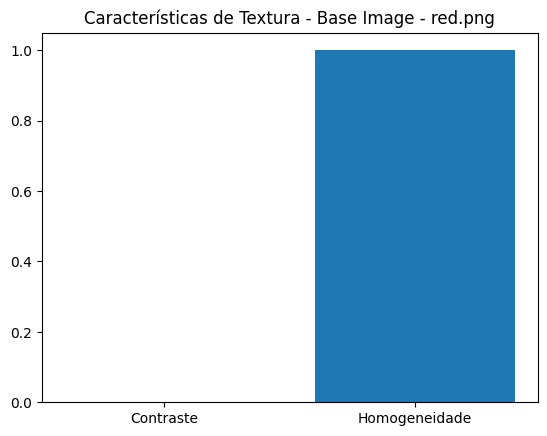

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


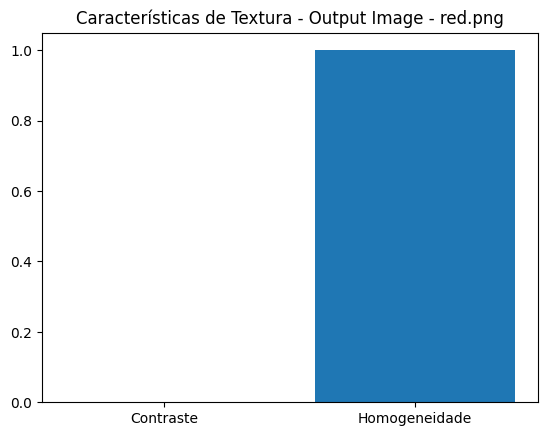

In [ ]:
def images_in_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder, filename)
            images[filename] = Image.open(image_path)
    return images


def plot_histograms(image, title):
    channels = ('r', 'g', 'b')
    plt.figure()
    plt.title(f"Histogramas de Cores - {title}")
    plt.xlabel("Intensidade")
    plt.ylabel("Contagem de Pixels")
    img_array = np.array(image)
    for i, color in enumerate(channels):
        hist, bins = np.histogram(img_array[:, :, i].ravel(), bins=256, range=(0, 256))
        plt.plot(bins[:-1], hist, color=color, alpha=0.6, label=f'{color.upper()} channel')
    plt.legend()
    plt.show()


def plot_dimensions(base_image, output_image, title):
    #Plota as dimensões das imagens
    base_dim = list(base_image.size)
    output_dim = list(output_image.size)

    plt.figure()
    plt.title(f"Dimensões - {title}")
    plt.bar(["Base", "Output"], base_dim, color='blue', alpha=0.5, label='Base')
    plt.bar(["Base", "Output"], output_dim, color='orange', alpha=0.5, label='Output')
    plt.ylabel("Dimensão (pixels)")
    plt.legend()
    plt.show()


def plot_texture_features(image, title):
    #Plota características de textura da imagem
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    plt.figure()
    plt.title(f"Características de Textura - {title}")
    plt.bar(["Contraste", "Homogeneidade"], [contrast, homogeneity])
    plt.show()


def visualize_images():
    base_images = images_in_folder(base_path)
    output_images = images_in_folder(output)

    for filename, base_img in base_images.items():
        output_img = output_images.get(filename)
        if output_img is None:
            print(f"Imagem {filename} não encontrada em {output}")
            continue

        plot_histograms(base_img, f"Base Image - {filename}")
        plot_histograms(output_img, f"Output Image - {filename}")
        plot_dimensions(base_img, output_img, f"Dimensões - {filename}")
        plot_texture_features(base_img, f"Base Image - {filename}")
        plot_texture_features(output_img, f"Output Image - {filename}")

# Testes de comparação com pytest, após essa célula também terá outras comparações mais específicas, como de dimensões
@pytest.fixture
def compare_images():
    base_images = images_in_folder(base_path)
    output_images = images_in_folder(output)
    return base_images, output_images


def test_compare_images(compare_images):
    base_images, output_images = compare_images

    for filename, base_img in base_images.items():
        output_img = output_images.get(filename)
        assert output_img is not None, f"Imagem {filename} não encontrada em {output}"
        assert np.array_equal(np.array(base_img), np.array(output_img)), f"As imagens {filename} diferem entre {base_path} e {output}"


# Execute visualização antes dos testes
visualize_images()

Nesse plot é possível verificar a comparação através de gráficos abordando base_path, onde está guardado as imagens originais e que não possuem nenhuma alteração e plots com output que se refere as imagens alteradas em termos de dimensão, cor e textura. Ambos se encontram em pastas separadas do drive e disponíveis no GitHub.

# Teste para cada função

In [ ]:
import pytest

@pytest.fixture
def images_in_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder, filename)
            images.append(Image.open(image_path))
    return images


def test_compare_resized_images(images_in_folder):
    base_images = images_in_folder(base_path)
    output_images = images_in_folder(output)

    for base_img, output_img in zip(base_images, output_images):
        assert compare_images(base_path, output)


def test_compare_red_images(images_in_folder):
    base_images = images_in_folder(base_path)
    output_images = images_in_folder(output)

    for base_img, output_img in zip(base_images, output_images):
        assert compare_images(base_path, output)


def test_extract_color_histogram_from_drive(images_in_folder):
    try:
        extract_color_histogram_from_drive(output)
    except Exception as e:
        pytest.fail(f"Não foi possível extrair histograma de cores: {e}")


def test_extract_texture_features_from_drive(images_in_folder):
    try:
        extract_texture_features_from_drive(output)
    except Exception as e:
        pytest.fail(f"Não foi possível extrair características de textura: {e}")